<center>
<h2>3A-MDS-E2-DL Deep Learning Optimization: Lab01</h2>
<hr>
<strong> Ben KABONGO B. </strong><br/>
M2 MVA, ENS Paris-Saclay<br/>
<i>ben.kabongo_buzangu@ens.paris-saclay.fr</i>
<hr>
</center>

Read carefully all the defined functions.

Answer to questions filling the functions

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

from random import seed
from random import random
from math import exp

from pprint import pprint

from utils import *

# Initialize the pseudo-random number generator 
seed(1)

## I. A simple classification problem

Below, we define a very simple $2D$ dataset with $10$ samples belonging to $2$ classes.

In this section we will have to generate a simple dense neural network and fill the functions of backpropagation for its optimization.

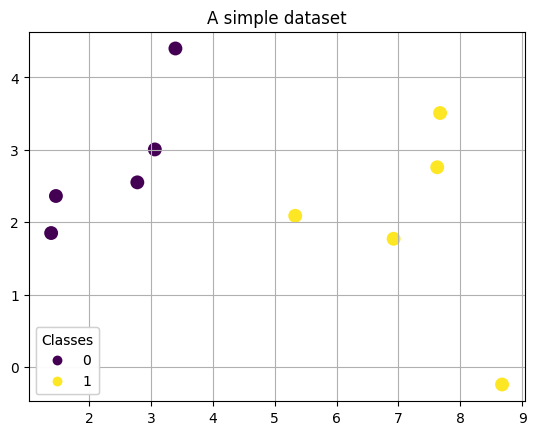

In [2]:
sdataset = [[2.7810836,2.550537003,0],
            [1.465489372,2.362125076,0],
            [3.396561688,4.400293529,0],
            [1.38807019,1.850220317,0],
            [7.627531214,2.759262235,1],
            [5.332441248,2.088626775,1],
            [6.922596716,1.77106367,1],
            [8.675418651,-0.242068655,1],
            [7.673756466,3.508563011,1],
            [3.06407232,3.005305973,0]]

dataset_np = np.array(sdataset)
fig, ax = plt.subplots()
colors = ['blue', 'orange']
scatter = ax.scatter(dataset_np[:,0], dataset_np[:,1], c=dataset_np[:,2], s=1e2, edgecolors='none')
legend = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend)
ax.grid(True)
ax.set_title('A simple dataset')
plt.show()

##     I.1. Optimization of a simple dense neural network

###         I.1.a. Initialization of the network

First let's define our deep neural network.

As parameters, we will use the size of the input, the number of hidden layers, their respective size and the size of the output.

Our network will be defined as a list (layers) of list (neurons) of dictionnaries (weights and other variables to store).

In [3]:
# Initialize a neural network with dense layers
def initialize_dense_network(size_inputs, n_hidden_layers, sizes_hidden_layers, size_outputs):
    network = []
    
    # Input layer
    input_layer = []
    for j in range(sizes_hidden_layers[0]):
        neuron =  {'weights': [random() for i in range(size_inputs+1)]}
        input_layer.append(neuron)
    network.append(input_layer)
    size_inputs = len(network[-1])
    
    # Hidden layers
    for layer_output_size in sizes_hidden_layers[1:]:
        hidden_layer = []
        for j in range(layer_output_size):
            neuron = {'weights': [random() for i in range(size_inputs+1)]}
            hidden_layer.append(neuron)
        network.append(hidden_layer)
        size_inputs = len(network[-1])
        
    # Output layer
    output_layer = []
    for j in range(size_outputs):
        neuron = {'weights': [random() for i in range(size_inputs + 1)]}
        output_layer.append(neuron)
    network.append(output_layer)
    return network

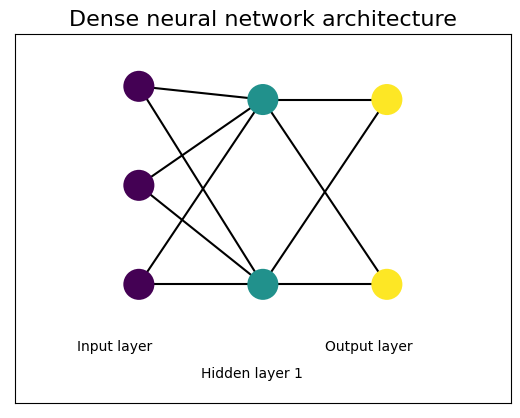

In [4]:
# Parameters of the dense neural network
size_inputs = 3
n_hidden_layers = 1
sizes_hidden_layers =  [2]
size_outputs = 2

# Initialize network
network = initialize_dense_network(size_inputs, n_hidden_layers, sizes_hidden_layers, size_outputs)

# Plot network
plot_dense_network(size_inputs, n_hidden_layers, sizes_hidden_layers, size_outputs)

**Q1: Why the first dimension has +1 length in the initialization of our dense network?**

> We add a dimension for the bias

### I.1.b Forward pass of an input

Below, you can have a look on the way that we discussed backpropagation in the class, for a $3$-layer network using an least-squares loss.

Lets start with the forward pass. For this experiment we will use sigmoid as the activation function.

<img src="slide_back_propagation.png">

In [5]:
 # Calculate neuron activation for an input from its weights
def activate_neuron(weights, inputs):
    bias = weights[-1]
    activation = 0
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    activation += bias
    return activation
 
# Activation function - Sigmoid function
def activation_function(activation):
    return 1.0 / (1.0 + exp(-activation))

For the forward pass, we need to calculate the output of each layer for each neuron. All of the outputs from one layer become inputs to the neurons of the next layer.

Propose an implementation of the $forward\_propagate$ function which takes as argument a network and an input row. It has to store for each neuron a new $output$ key in the $network$ dictionnries and returns it as the next input.

**Q2: Implement forward propagation with the proposed schema.**

In [6]:
# Forward propagate input row to a network output - store each intermediate output of each neuron
def forward_propagate(network, row):
    '''
    ####################################### ADD YOUR CODE HERE #######################################
    INPUTS: network: model as definied in initialize_dense_network function
            row: input for the model to forward propagate
    Stores for each neuron a new output key in network
    RETURN: calculated outputs of the last layer
    '''
    outputs = []
    for l, layer in enumerate(network):
        outputs = []
        for n, neuron in enumerate(layer):
            activation = activate_neuron(neuron["weights"], row)
            output = activation_function(activation)
            outputs.append(output)
            network[l][n]["output"] = output
        row = outputs
    return outputs

In [7]:
# test forward propagation
network = initialize_dense_network(2, 1, [2], 2)

print('Network before forward propagation :')
pprint(network)

row = [1, 0]
output = forward_propagate(network, row)
print('\nNetwork after forward propagation :')
pprint(network)

print('\nNetwork output after forward propagation :')
pprint(output)

Network before forward propagation :
[[{'weights': [0.4453871940548014, 0.7215400323407826, 0.22876222127045265]},
  {'weights': [0.9452706955539223, 0.9014274576114836, 0.030589983033553536]}],
 [{'weights': [0.0254458609934608, 0.5414124727934966, 0.9391491627785106]},
  {'weights': [0.38120423768821243, 0.21659939713061338, 0.4221165755827173]}]]

Network after forward propagation :
[[{'output': 0.6624316591516094,
   'weights': [0.4453871940548014, 0.7215400323407826, 0.22876222127045265]},
  {'output': 0.726286112831076,
   'weights': [0.9452706955539223, 0.9014274576114836, 0.030589983033553536]}],
 [{'output': 0.7940030053971631,
   'weights': [0.0254458609934608, 0.5414124727934966, 0.9391491627785106]},
  {'output': 0.6967673987431665,
   'weights': [0.38120423768821243, 0.21659939713061338, 0.4221165755827173]}]]

Network output after forward propagation :
[0.7940030053971631, 0.6967673987431665]


### I.1.c Backpropagation of the error

By storing intermediate outputs of layers, we can now easily back propagate the result of the least square loss differentiation with respect to network parameters.

To compute the backpropagation we need the derivative of the activation function.

In [8]:
# Calculate the derivative of an neuron output - Sigmoid function case
def activation_function_derivative(output):
    return output * (1.0 - output)

**Q3: Explain the definition of the $activation\_function\_derivative$ function on the derivative of the sigmoid function.**

> $
\begin{aligned}
\sigma'(x) & = \frac{d}{dx}\left(\frac{1}{1 + e^{-x}}\right) \\
& = \frac{d}{dx}\left(\frac{1}{1 + e^{-x}}\right) \cdot \frac{e^{-x}}{e^{-x}} \\
& = \frac{e^{-x}}{(1 + e^{-x})^2} \\
& = \frac{e^{-x}}{(1 + e^{-x})}\cdot\frac{1}{(1 + e^{-x})} \\
& = \frac{1}{1 + e^{-x}}\cdot\frac{e^{-x}}{1 + e^{-x}} \\
& = \sigma(x) \cdot (1 - \sigma(x))
\end{aligned}
$


The first step is to calculate the error for each output neuron. The error for the output layer can be calculated as follows:

$error = (expected - output) * activation\_function\_derivative(output)$

where expected is the expected output value for the neuron (the class value itself), output is the output value for the neuron and $activation\_function\_derivative()$ calculates the slope of the neuron’s output value.

The error signal for a neuron in the hidden layer is calculated as the weighted error of each neuron in the output layer.

The back-propagated error signal is accumulated and then used to determine the error for the $kth$ neuron in the hidden layer, as follows:

$error_k = (\sum_{j} weight_{kj} * error_j) * activation\_function\_derivative(output_k)$

where:
- $error_j$ is the error signal from the $jth$ neuron in the output layer
- $weight_{kj}$ is the weight that connects the $kth$ neuron in the input layer to the $jth$ neuron in the output layer
- $output_k$ is the output for the $kth$ neuron in the input layer.

We are going to implement this procedure in a function named $backward\_propagate\_error()$.

We want to store the error signal calculated for each neuron in each layer (without matrix computation -- similar to the $forward\_propagate()$ function) with the name $delta$.

TIP : Starting from the end of the network.

**Q4: Implement back propagation with the proposed schema**

In [9]:
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    '''
    ####################################### ADD YOUR CODE HERE #######################################
    INPUTS: network: model as definied in initialize_dense_network function
            expected: ground truth vector
    Stores for each neuron a new delta key in network representing the propagated error
    RETURN: None
    '''
    for n in range(len(network[-1])):
        network[-1][n]["delta"] = (expected[n] - network[-1][n]["output"]) * activation_function_derivative(network[-1][n]["output"])
    for l in range(len(network)-2, -1, -1):
        for k in range(len(network[l])):
            output_k = activation_function_derivative(network[l][k]["output"])
            weighted_error = 0
            for j in range(len(network[l+1])):
                weight_kj = network[l][k]["weights"][j]
                delta_j = network[l+1][j]["delta"]
                weighted_error += weight_kj * delta_j
            network[l][k]["delta"] = weighted_error * output_k
                
    

In [10]:
# test backpropagation of error
print('Network before backpropagation :')
pprint(network)


Network before backpropagation :
[[{'output': 0.6624316591516094,
   'weights': [0.4453871940548014, 0.7215400323407826, 0.22876222127045265]},
  {'output': 0.726286112831076,
   'weights': [0.9452706955539223, 0.9014274576114836, 0.030589983033553536]}],
 [{'output': 0.7940030053971631,
   'weights': [0.0254458609934608, 0.5414124727934966, 0.9391491627785106]},
  {'output': 0.6967673987431665,
   'weights': [0.38120423768821243, 0.21659939713061338, 0.4221165755827173]}]]


In [11]:
expected = [0, 1]
backward_propagate_error(network, expected)
print('\nNetwork after backpropagation :')
pprint(network)


Network after backpropagation :
[[{'delta': -0.0025971844774101307,
   'output': 0.6624316591516094,
   'weights': [0.4453871940548014, 0.7215400323407826, 0.22876222127045265]},
  {'delta': -0.012923402638306963,
   'output': 0.726286112831076,
   'weights': [0.9452706955539223, 0.9014274576114836, 0.030589983033553536]}],
 [{'delta': -0.12986890442651444,
   'output': 0.7940030053971631,
   'weights': [0.0254458609934608, 0.5414124727934966, 0.9391491627785106]},
  {'delta': 0.06406776960609507,
   'output': 0.6967673987431665,
   'weights': [0.38120423768821243, 0.21659939713061338, 0.4221165755827173]}]]


### I.1.d Update the weights

Once errors are calculated for each neuron in the network via the back propagation method above, they can be used to update weights.

We will first update network weights with a simple schema as follows:

$weight = weight + learning\_rate * error * input$

where $weight$ is a given weight, $learning\_rate$ is a parameter that you must specify, $error$ is the error calculated by the backpropagation procedure for the neuron and input is the input value that produced this error.

Do no forget to update the bias weight (Be careful the differentation term toward this weight is different).

Below is a function named $update\_weights()$ that updates the weights for a network given an input row of data, a learning rate and assume that a forward and backward propagation have already been performed.

Remember that the input for the output layer is a collection of outputs from the hidden layer.

In [12]:
# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        # Discard last dimension because containing groundtruth label.
        inputs = row[:-1]
        if i != 0:
            # After the first layer inputs become the output of the previous layer
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']

Now we have all the functions we need to train our network.

In [13]:
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, size_outputs):
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            label = int(row[-1])
            outputs = forward_propagate(network, row)
            # Create one_hot encoded vector for expected output
            expected = [0 for i in range(size_outputs)]
            expected[label] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        if epoch % 50 == 0:
            print(' '*4+'Train Epoch = {}, Loss = {:.3f}'.format(epoch, sum_error))
            
# Split a dataset into train and test set
def train_test_split(dataset, test_size=2):
    train_set = list(dataset[:-test_size])
    test_set = list(dataset[-test_size:])
    return train_set, test_set

In [14]:
# Split dataset in train and test sets
train_set, test_set = train_test_split(sdataset)

In [15]:
# Train network with the train set
size_inputs = len(train_set[0]) - 1
n_hidden_layers = 1
sizes_hidden_layers =  [3]
size_outputs = 2

l_rate = 0.5
n_epoch = 300

network = initialize_dense_network(size_inputs, n_hidden_layers, sizes_hidden_layers, size_outputs)
train_network(network, train_set, l_rate, n_epoch, size_outputs)

    Train Epoch = 0, Loss = 5.989
    Train Epoch = 50, Loss = 4.142
    Train Epoch = 100, Loss = 3.964
    Train Epoch = 150, Loss = 3.792
    Train Epoch = 200, Loss = 3.632
    Train Epoch = 250, Loss = 3.486


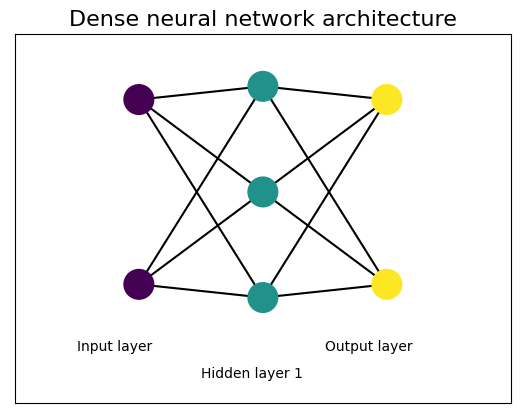

In [16]:
plot_dense_network(size_inputs, n_hidden_layers, sizes_hidden_layers, size_outputs)

In [17]:
# Train network with the train set
size_inputs = len(train_set[0]) - 1
n_hidden_layers = 2
sizes_hidden_layers =  [3, 2]
size_outputs = 2

l_rate = 0.5
n_epoch = 300

network = initialize_dense_network(size_inputs, n_hidden_layers, sizes_hidden_layers, size_outputs)
train_network(network, train_set, l_rate, n_epoch, size_outputs)

    Train Epoch = 0, Loss = 5.206
    Train Epoch = 50, Loss = 4.294
    Train Epoch = 100, Loss = 4.293
    Train Epoch = 150, Loss = 4.291
    Train Epoch = 200, Loss = 4.289
    Train Epoch = 250, Loss = 4.286


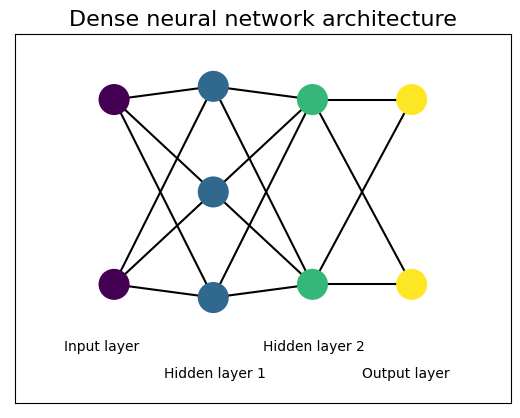

In [18]:
plot_dense_network(size_inputs, n_hidden_layers, sizes_hidden_layers, size_outputs)

We can make a prediction with our network on the test set.

In [19]:
# Make a prediction in the test set
def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))

In [ ]:
for row in test_set:
    prediction = predict(network, row)
    print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=1, Got=1
Expected=0, Got=1


## II. Wheat seeds dataset

Now we are going to test our optimization algorithm on a more complex dataset.

As a new dataset, we will use the seeds dataset that consists of measurements of different wheat species.

There are $201$ records and $7$ numerical input variables. It is a classification problem with $3$ output classes. The scale for each numeric input value vary. As in many machine learning methods, data normalization could be very helpful.

Using the Zero Rule algorithm that predicts the most common class value, the baseline accuracy for the problem is $28.095\%$.

### II.1. Our basic python implementaion

We will evaluate the algorithm using k-fold cross-validation with $5$ folds. This means that $201/5=40.2$ or $40$ records will be in each fold. We will use the helper functions $evaluate\_algorithm()$ to evaluate the algorithm with cross-validation and $accuracy\_metric()$ to calculate the accuracy of predictions.

A new function named $back\_propagation()$was developed to manage the application of the Backpropagation algorithm, first initializing a network, training it on the training dataset and then using the trained network to make predictions on a test dataset.

In [21]:
from random import randrange
 
# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list()
    stats = [[min(column), max(column)] for column in zip(*dataset)]
    return stats
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)-1):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual))
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for it_fold, fold in enumerate(folds):
        print('\nCross Validation - Fold {}/{}'.format(it_fold+1, len(folds)))
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        val_set = fold
        predicted = algorithm(train_set, val_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

# Backpropagation Algorithm With Stochastic Gradient Descent
def back_propagation(train, val, l_rate, n_epoch, n_hidden_layers, sizes_hidden_layers):
    size_inputs = len(train[0]) - 1
    size_outputs = len(set([row[-1] for row in train]))
    network = initialize_dense_network(size_inputs, n_hidden_layers, sizes_hidden_layers, size_outputs)
    train_network(network, train, l_rate, n_epoch, size_outputs)
    predictions = list()
    for row in val:
        prediction = predict(network, row)
        predictions.append(prediction)
    return(predictions)

In [22]:
# Load dataset
import pandas as pd
data = pd.read_csv('seeds_dataset.txt', sep="\t", header=None)
data

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [23]:
# Transform class labels to [0, n_labels-1]
wdataset = data.to_numpy()
wdataset[:,-1] = wdataset[:,-1]-1
wdataset = wdataset.tolist()

# Normalize input variables
minmax = dataset_minmax(wdataset)
normalize_dataset(wdataset, minmax)

# Evaluate algorithm
n_folds = 5
l_rate = 0.5
n_epoch = 500
n_hidden_layers = 2
sizes_hidden_layers =  [4, 4]

scores = evaluate_algorithm(wdataset, back_propagation, n_folds, l_rate, n_epoch, n_hidden_layers, sizes_hidden_layers)
print('\nScores: {}'.format(['{:.2%}'.format(s) for s in scores]))
print('Mean Accuracy: {:.2%}'.format(np.mean(scores)))


Cross Validation - Fold 1/5
    Train Epoch = 0, Loss = 131.874
    Train Epoch = 50, Loss = 87.695
    Train Epoch = 100, Loss = 68.193
    Train Epoch = 150, Loss = 64.183
    Train Epoch = 200, Loss = 65.219
    Train Epoch = 250, Loss = 67.164
    Train Epoch = 300, Loss = 68.883
    Train Epoch = 350, Loss = 70.011
    Train Epoch = 400, Loss = 70.498
    Train Epoch = 450, Loss = 70.524

Cross Validation - Fold 2/5
    Train Epoch = 0, Loss = 133.307
    Train Epoch = 50, Loss = 114.367
    Train Epoch = 100, Loss = 110.476
    Train Epoch = 150, Loss = 108.268
    Train Epoch = 200, Loss = 105.348
    Train Epoch = 250, Loss = 102.815
    Train Epoch = 300, Loss = 100.597
    Train Epoch = 350, Loss = 98.633
    Train Epoch = 400, Loss = 96.855
    Train Epoch = 450, Loss = 95.254

Cross Validation - Fold 3/5
    Train Epoch = 0, Loss = 127.553
    Train Epoch = 50, Loss = 64.393
    Train Epoch = 100, Loss = 64.783
    Train Epoch = 150, Loss = 64.898
    Train Epoch = 200, Lo

### II.2. Implementation with pytorch

In the section, we propose to solve the same classification problem with a pytorch implementation.

If you work locally, install PyTorch using the instructions that are available here : https://pytorch.org/get-started/locally/

Do not hesitate to check the available documentation and tutorials!

In [24]:
import pandas as pd

# One-hot encoding of the data in order to easily use pytorch data loaders
one_hot = pd.get_dummies(data.iloc[:,-1], prefix='label')
data_one_hot = pd.concat([data.drop(labels=[7], axis=1), one_hot], axis=1)
data_one_hot

,0,1,2,3,4,5,6,label_1,label_2,label_3
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,0,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,0,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,0,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,0,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,0,0
...,...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,0,0,1
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,0,0,1
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,0,0,1
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,0,0,1


In [25]:
# Normalize class labels to [0, n_labels-1]
wdataset_one_hot = data_one_hot.to_numpy()
wdataset_one_hot = wdataset_one_hot.tolist()

# normalize input variables
minmax = dataset_minmax(wdataset_one_hot)
normalize_dataset(wdataset_one_hot, minmax)

In pytorch, you can define your network architecture as class of the $torch.nn.Module$.

You just have to define the forward function, and the backward function where gradients are computed automatically using autograd. You can use any of the Tensor operations in the forward function.

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Define a neural network architecture
class dense_network(nn.Module):
    def __init__(self, size_inputs, n_hidden_layers, sizes_hidden_layers, size_outputs):
        super(dense_network, self).__init__()
        # Input layer
        sizes_hidden_layers = sizes_hidden_layers+[sizes_hidden_layers[-1]]
        self.n_hidden_layers = n_hidden_layers
        self.input_layer = nn.Linear(size_inputs, sizes_hidden_layers[0])
        
        # Hidden layers as a list module
        self.hidden_layers = nn.ModuleList()
        for n_hidden_layer in range(n_hidden_layers):
            self.hidden_layers.append( nn.Linear(sizes_hidden_layers[n_hidden_layer], sizes_hidden_layers[n_hidden_layer+1]))
            
        # Output layer
        self.output_layer = nn.Linear(sizes_hidden_layers[-1], size_outputs)
                                      
    def forward(self, x):
        x = torch.sigmoid(self.input_layer(x))
        for n_hidden_layer in range(self.n_hidden_layers):
            x = torch.sigmoid(self.hidden_layers[n_hidden_layer](x))
        x = torch.sigmoid(self.output_layer(x))
        return x

In [27]:
# Initialize network
size_inputs = 7
n_hidden_layers = 2
sizes_hidden_layers =  [4, 4]
size_outputs = 3

network = dense_network(size_inputs, n_hidden_layers, sizes_hidden_layers, size_outputs)
print(network)

dense_network(
  (input_layer): Linear(in_features=7, out_features=4, bias=True)
  (hidden_layers): ModuleList(
    (0-1): 2 x Linear(in_features=4, out_features=4, bias=True)
  )
  (output_layer): Linear(in_features=4, out_features=3, bias=True)
)


In [28]:
# Verify the weights according to the parameters of the architecture you initialized
params = list(network.parameters())
print('Parameters:\n', params)

Parameters:
 [Parameter containing:
tensor([[ 0.3779, -0.1503,  0.1512,  0.1891,  0.2170, -0.2568, -0.2571],
        [ 0.3480,  0.0369,  0.0354, -0.0958,  0.2651, -0.3190, -0.2985],
        [ 0.0260,  0.2634, -0.2865,  0.0032,  0.0749, -0.3277, -0.2738],
        [ 0.3103,  0.0784,  0.2466,  0.1031,  0.3110, -0.0633,  0.0323]],
       requires_grad=True), Parameter containing:
tensor([ 0.1193, -0.0118,  0.2950, -0.0663], requires_grad=True), Parameter containing:
tensor([[ 4.6145e-01,  8.8287e-02, -4.6330e-01,  6.7927e-02],
        [-2.7337e-01, -1.6804e-01,  2.8166e-01,  1.6271e-01],
        [ 3.3380e-01,  3.3283e-01, -2.5814e-01, -2.6999e-01],
        [ 4.4620e-04, -1.7410e-01,  2.7979e-01, -4.0020e-01]],
       requires_grad=True), Parameter containing:
tensor([ 0.3524,  0.1758, -0.3773,  0.2776], requires_grad=True), Parameter containing:
tensor([[ 0.1587,  0.4691, -0.0811,  0.2078],
        [-0.1263, -0.2863, -0.4570,  0.2386],
        [-0.2027, -0.0533, -0.0080,  0.2954],
        

Now we can define a cross validation function which train and test the network for each fold of our dataset.

In [38]:
# Train function
def pytorch_train(network, loader, optimizer, criterion, n_epoch):
    network.train()
    for epoch in range(n_epoch):
        train_loss = 0
        for batch_idx, (data, target) in enumerate(loader):
            optimizer.zero_grad()
            net_out = network(data)
            loss = criterion(net_out, target)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        if epoch % (n_epoch // 10) == 0:
            print(' '*4+'Train Epoch = {}, error = {:.3f}'.format(epoch, train_loss))

# Evaluation function
def pytorch_validation(network, loader, optimizer, criterion, n_classes):
    eval_loss = 0
    correct = 0
    network.eval()
    for data, target in loader:
        net_out = network(data)
        eval_loss += criterion(net_out, target).item()
        idx = net_out.data.max(1)[1] 
        pred = torch.Tensor([0] * n_classes)
        pred[idx] = 1
        if (pred.numpy() == target.numpy()).all():
            correct += 1
    correct /= len(loader.dataset)
    eval_loss /= len(loader.dataset)
    return correct

def pytorch_cross_validation(dataset, n_epoch, l_rate, n_folds, size_outputs):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for it_fold, fold in enumerate(folds):
        # Initialize network
        size_inputs = 7
        n_hidden_layers = 2
        sizes_hidden_layers =  [4, 4]
        size_outputs = 3
        network = dense_network(size_inputs, n_hidden_layers, sizes_hidden_layers, size_outputs)
        
        # Initialize stochastic gradient descent optimizer
        optimizer = optim.SGD(network.parameters(), lr=l_rate)
        # Initialize loss function
        criterion = nn.MSELoss()
        
        print('\nCross Validation - Fold {}/{}'.format(it_fold+1, len(folds)))
        train_set = list(folds)
        train_set.remove(fold)
        train_set = np.array(sum(train_set, []))
        val_set = np.array(fold)
        
        # Build pytorch data train and validation loaders
        train_set = torch.tensor(np.array(train_set)).float()
        train_set = torch.utils.data.TensorDataset(train_set[:,:-3], train_set[:,-3:])
        train_loader = torch.utils.data.DataLoader(train_set)
        val_set = torch.tensor(np.array(val_set)).float()
        val_set = torch.utils.data.TensorDataset(val_set[:,:-3], val_set[:,-3:])
        val_loader = torch.utils.data.DataLoader(val_set)
        
        # train and evaluate network on fold
        pytorch_train(network, val_loader, optimizer, criterion, n_epoch)
        val_score = pytorch_validation(network, val_loader, optimizer, criterion, size_outputs)
        scores.append(val_score)
    return scores

In [37]:
# Cross Validation
n_folds = 5
n_epoch = 600
l_rate = 0.5
scores = pytorch_cross_validation(wdataset_one_hot, n_epoch, l_rate, n_folds, size_outputs)
print('\nScores: {}'.format(['{:.2%}'.format(s) for s in scores]))
print('Mean Accuracy: {:.2%}'.format(np.mean(scores)))


Cross Validation - Fold 1/5
    Train Epoch = 0, error = 9.488
    Train Epoch = 100, error = 9.344
    Train Epoch = 200, error = 9.332
    Train Epoch = 300, error = 9.323
    Train Epoch = 400, error = 9.285
    Train Epoch = 500, error = 4.885

Cross Validation - Fold 2/5
    Train Epoch = 0, error = 9.912
    Train Epoch = 100, error = 9.364
    Train Epoch = 200, error = 2.687
    Train Epoch = 300, error = 0.324
    Train Epoch = 400, error = 0.063
    Train Epoch = 500, error = 0.035

Cross Validation - Fold 3/5
    Train Epoch = 0, error = 9.713
    Train Epoch = 100, error = 9.058
    Train Epoch = 200, error = 9.006
    Train Epoch = 300, error = 3.964
    Train Epoch = 400, error = 1.241
    Train Epoch = 500, error = 0.749

Cross Validation - Fold 4/5
    Train Epoch = 0, error = 10.393
    Train Epoch = 100, error = 9.307
    Train Epoch = 200, error = 9.280
    Train Epoch = 300, error = 5.889
    Train Epoch = 400, error = 4.182
    Train Epoch = 500, error = 2.003

Cr

# III CIFAR-10 Data set

In this section we will tackle a more difficult problem: a classification task on the $CIFAR-10$ data set.

<img src="cifar_10_examples.png">

To gain some time, the next cell proposes a pytorch dataloader from the modified file located at https://github.com/pytorch/vision/blob/master/torchvision/datasets/cifar.py in order to obtain a training loader that will only use the first 100 samples of the CIFAR-10 training set.

In [31]:
from __future__ import print_function
from PIL import Image
import os
import os.path
import numpy as np
import sys
import hashlib
import errno
from torch.utils.model_zoo import tqdm
if sys.version_info[0] == 2:
    import cPickle as pickle
else:
    import pickle
import torchvision.transforms as transforms
import torch.utils.data as data

def download_url(url, root, filename=None, md5=None):
    """Download a file from a url and place it in root.
    Args:
        url (str): URL to download file from
        root (str): Directory to place downloaded file in
        filename (str, optional): Name to save the file under. If None, use the basename of the URL
        md5 (str, optional): MD5 checksum of the download. If None, do not check
    """
    from six.moves import urllib
    root = os.path.expanduser(root)
    if not filename:
        filename = os.path.basename(url)
    fpath = os.path.join(root, filename)
    makedir_exist_ok(root)
    # downloads file
    if os.path.isfile(fpath) and check_integrity(fpath, md5):
        print('Using downloaded and verified file: ' + fpath)
    else:
        try:
            print('Downloading ' + url + ' to ' + fpath)
            urllib.request.urlretrieve(
                url, fpath,
                reporthook=gen_bar_updater()
            )
        except OSError:
            if url[:5] == 'https':
                url = url.replace('https:', 'http:')
                print('Failed download. Trying https -> http instead.'
                      ' Downloading ' + url + ' to ' + fpath)
                urllib.request.urlretrieve(
                    url, fpath,
                    reporthook=gen_bar_updater()
                )
                
def makedir_exist_ok(dirpath):
    """
    Python2 support for os.makedirs(.., exist_ok=True)
    """
    try:
        os.makedirs(dirpath)
    except OSError as e:
        if e.errno == errno.EEXIST:
            pass
        else:
            raise
            
def gen_bar_updater():
    pbar = tqdm(total=None)
    def bar_update(count, block_size, total_size):
        if pbar.total is None and total_size:
            pbar.total = total_size
        progress_bytes = count * block_size
        pbar.update(progress_bytes - pbar.n)
    return bar_update

def check_integrity(fpath, md5=None):
    if md5 is None:
        return True
    if not os.path.isfile(fpath):
        return False
    md5o = hashlib.md5()
    with open(fpath, 'rb') as f:
        # read in 1MB chunks
        for chunk in iter(lambda: f.read(1024 * 1024), b''):
            md5o.update(chunk)
    md5c = md5o.hexdigest()
    if md5c != md5:
        return False
    return True

class CIFAR10(data.Dataset):
    """`CIFAR10 <https://www.cs.toronto.edu/~kriz/cifar.html>`_ Dataset.
    Args:
        root (string): Root directory of dataset where directory
            ``cifar-10-batches-py`` exists or will be saved to if download is set to True.
        transform (callable, optional): A function/transform that takes in an PIL image
            and returns a transformed version. E.g, ``transforms.RandomCrop``
        target_transform (callable, optional): A function/transform that takes in the
            target and transforms it.
        download (bool, optional): If true, downloads the dataset from the internet and
            puts it in root directory. If dataset is already downloaded, it is not
            downloaded again.
    """
    base_folder = 'cifar-10-batches-py'
    url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    filename = "cifar-10-python.tar.gz"
    tgz_md5 = 'c58f30108f718f92721af3b95e74349a'
    train_list = [
        ['data_batch_1', 'c99cafc152244af753f735de768cd75f'],
        ['data_batch_2', 'd4bba439e000b95fd0a9bffe97cbabec'],
        ['data_batch_3', '54ebc095f3ab1f0389bbae665268c751'],
        ['data_batch_4', '634d18415352ddfa80567beed471001a'],
        ['data_batch_5', '482c414d41f54cd18b22e5b47cb7c3cb'],
    ]
    test_list = [
        ['test_batch', '40351d587109b95175f43aff81a1287e'],
    ]
    meta = {
        'filename': 'batches.meta',
        'key': 'label_names',
        'md5': '5ff9c542aee3614f3951f8cda6e48888',
    }
    def __init__(self, root, download=False, dset='train', crop=True, transform=None):
        self.root = root
        self.transform = transform
        self.dset = dset
        self.crop = crop
        if download:
            self.download()
        if self.dset == 'train':
            downloaded_list = self.train_list
        elif self.dset == 'test':
            downloaded_list = self.test_list
        self.data = []
        self.targets = []
        # now load the picked numpy arrays
        for file_name, checksum in downloaded_list:
            file_path = os.path.join(self.root, self.base_folder, file_name)
            with open(file_path, 'rb') as f:
                if sys.version_info[0] == 2:
                    entry = pickle.load(f)
                else:
                    entry = pickle.load(f, encoding='latin1')
                self.data.append(entry['data'])
                if 'labels' in entry:
                    self.targets.extend(entry['labels'])
                else:
                    self.targets.extend(entry['fine_labels'])
        self.data = np.vstack(self.data).reshape(-1, 3, 32, 32)
        self.data = self.data.transpose((0, 2, 3, 1))  # convert to HWC
        if self.crop == True and self.dset == 'train':
            self.data = self.data[0:100]
            self.targets = self.targets[0:100]
        elif self.crop == False and self.dset == 'train':
            self.data = self.data[100:]
            self.targets = self.targets[100:]
        self._load_meta()
        
    def _load_meta(self):
        path = os.path.join(self.root, self.base_folder, self.meta['filename'])
        if not check_integrity(path, self.meta['md5']):
            raise RuntimeError('Dataset metadata file not found or corrupted.' +
                               ' You can use download=True to download it')
        with open(path, 'rb') as infile:
            if sys.version_info[0] == 2:
                data = pickle.load(infile)
            else:
                data = pickle.load(infile, encoding='latin1')
            self.classes = data[self.meta['key']]
        self.class_to_idx = {_class: i for i, _class in enumerate(self.classes)}
        
    def __getitem__(self, index):
        """
        Args:
            index (int): Index
        Returns:
            tuple: (image, target) where target is index of the target class.
        """
        img, target = self.data[index], self.targets[index]
        # doing this so that it is consistent with all other datasets
        # to return a PIL Image
        img = Image.fromarray(img)
        if self.transform is not None:
            img = self.transform(img)
        return img, target
    
    def __len__(self):
        return len(self.data)
    
    def download(self):
        import tarfile
        download_url(self.url, self.root, self.filename, self.tgz_md5)
        # extract file
        with tarfile.open(os.path.join(self.root, self.filename), "r:gz") as tar:
            tar.extractall(path=self.root)
            
    def extra_repr(self):
        return "Split: {}".format("Train" if self.train is True else "Test")

In [32]:
path_to_data = os.getcwd()
import torch

# Transformations applied to img
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Get train, val datasets and dataloaders
x_train = CIFAR10(path_to_data, download=True, dset='train', crop=False, transform=transform)
trainloader = torch.utils.data.DataLoader(x_train, batch_size=32, shuffle=True)
x_test = CIFAR10(path_to_data, download=True, dset='test', crop=False, transform=transform)
testloader = torch.utils.data.DataLoader(x_test, batch_size=32, shuffle=False)

Using downloaded and verified file: /Users/benkabongo25/Studies/MVA/S1/Deep Learning/Labs/Lab01_Deep_Learning_Optimization/cifar-10-python.tar.gz
Using downloaded and verified file: /Users/benkabongo25/Studies/MVA/S1/Deep Learning/Labs/Lab01_Deep_Learning_Optimization/cifar-10-python.tar.gz


**Q5: Propose a simple CNN architecture and train it with the proposed loader. Try to achieve the best test accuracy !**

In [34]:
class ConvNet(nn.Module):
    '''
    ####################################### ADD YOUR CODE HERE #######################################
    Pytorch network definition: see documentation, tutorials or examples for help.
    '''
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 16 * 16, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 16 * 16 * 16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [42]:
l_rate = 1e-2
n_epoch = 100
network = ConvNet()

optimizer = optim.SGD(network.parameters(), lr=l_rate)
criterion = nn.CrossEntropyLoss()

pytorch_train(network, trainloader, optimizer, criterion, n_epoch)

    Train Epoch = 0, error = 2809.851
    Train Epoch = 10, error = 1290.347
    Train Epoch = 20, error = 819.130
    Train Epoch = 30, error = 450.104
    Train Epoch = 40, error = 205.354
    Train Epoch = 50, error = 46.248
    Train Epoch = 60, error = 14.451
    Train Epoch = 70, error = 8.003
    Train Epoch = 80, error = 5.454
    Train Epoch = 90, error = 4.111


In [43]:
eval_loss = 0
correct = 0
network.eval()
for data, target in testloader:
    net_out = network(data)
    eval_loss += criterion(net_out, target).item()
    correct += (torch.softmax(net_out, dim=1).argmax(1) == target).float().sum().item()
correct /= len(testloader.dataset)
eval_loss /= len(testloader.dataset)
print("Accuracy :", 100*correct)

Accuracy : 62.39


# IV Try to fail

**Q6: Now that we have successfully trained both our network with our costum functions for back propagation and with the functions provided by pytorch, try to change the hyperparameters of the network in order to make its optimization to fail.**

**You can use either your python implementation or the pytorch one.**

**You can mainly play on the parameters of:**
- **network architecture**
- **optimization & training**
